In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

## linear dataset

In [2]:
np.random.seed(42)

In [3]:
X,y = make_blobs(n_samples=500,centers=4,n_features=10,random_state=42)
X = X + np.random.normal(scale=5,size=X.shape)

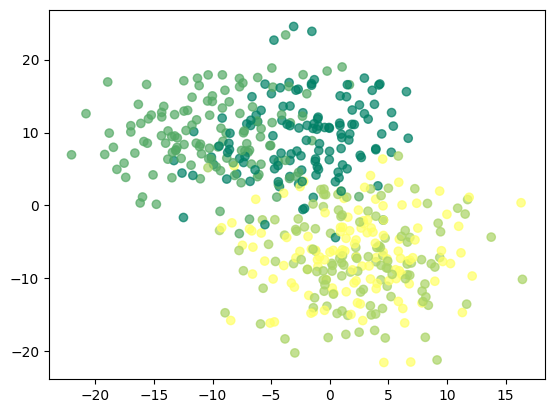

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

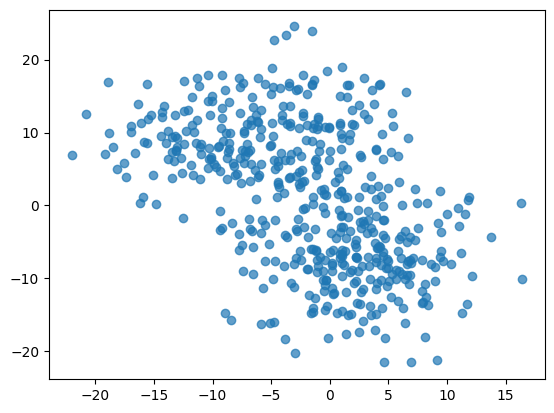

In [5]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [6]:
X.shape

(500, 10)

In [7]:
df_linear = pd.DataFrame(X) 

In [8]:
df_linear.columns = [f"col_{col}" for col in df_linear.columns]

In [9]:
df_linear['target'] = y

In [10]:
df_linear

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target
0,-5.915826,9.415179,10.238744,2.932082,-7.560789,-8.384469,3.817842,3.587400,-4.383650,-1.607136,1
1,-1.011345,-8.364777,-7.523082,-2.183446,1.108751,2.778589,-8.090733,-6.473995,-0.460039,-9.216038,3
2,-1.521256,8.884683,6.051055,-11.790977,-9.621378,-4.969239,-9.302836,4.211802,-4.587759,-5.983203,1
3,-0.511033,1.512426,-5.233148,-9.923943,3.583774,-1.965502,-4.866862,-9.777110,-4.113496,-8.388731,2
4,6.641074,-7.592013,-9.231718,8.030529,3.776678,2.086960,-5.886460,-4.564809,3.010796,-9.167377,3
...,...,...,...,...,...,...,...,...,...,...,...
495,3.934286,-1.479775,0.303991,4.110236,1.571178,-1.291063,-7.168167,5.228464,2.771318,-7.182853,2
496,-0.415591,-10.877519,-2.811240,-1.123830,-3.145576,5.866439,-11.446325,5.395608,1.606887,-0.122200,2
497,8.964476,-8.452273,-9.339726,-12.794640,-8.763353,0.186548,1.309891,0.903259,2.360404,-21.488913,2
498,-14.342360,12.762542,8.762939,-5.296737,-5.317876,2.166731,-5.524547,0.760455,-0.050439,7.297902,1


In [11]:
df_linear['target'].value_counts()

target
1    125
3    125
2    125
0    125
Name: count, dtype: int64

In [12]:
# sns.pairplot(df_linear)

<Axes: ylabel='Density'>

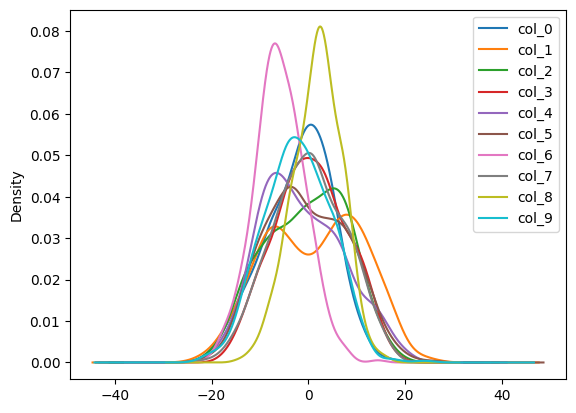

In [13]:
df_linear.iloc[:,:-1].plot(kind='density')

### correlation matrix

In [14]:
df_linear.iloc[:,:-1].corr()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
col_0,1.000000,-0.486942,-0.447335,0.350051,0.410801,0.452514,-0.075782,-0.211216,0.229445,-0.140779
col_1,-0.486942,1.000000,0.613055,-0.308053,-0.535676,-0.660596,-0.042907,0.442483,-0.203147,0.347897
col_2,-0.447335,0.613055,1.000000,-0.404254,-0.585948,-0.588399,-0.045079,0.449298,-0.257066,0.224178
col_3,0.350051,-0.308053,-0.404254,1.000000,0.417966,0.273300,-0.042056,-0.252915,0.293808,0.237288
col_4,0.410801,-0.535676,-0.585948,0.417966,1.000000,0.522756,0.058207,-0.516129,0.230401,-0.100335
col_5,0.452514,-0.660596,-0.588399,0.273300,0.522756,1.000000,0.006910,-0.388445,0.217423,-0.325186
col_6,-0.075782,-0.042907,-0.045079,-0.042056,0.058207,0.006910,1.000000,-0.142480,-0.039972,-0.116193
col_7,-0.211216,0.442483,0.449298,-0.252915,-0.516129,-0.388445,-0.142480,1.000000,-0.095332,0.161269
col_8,0.229445,-0.203147,-0.257066,0.293808,0.230401,0.217423,-0.039972,-0.095332,1.000000,0.032065
col_9,-0.140779,0.347897,0.224178,0.237288,-0.100335,-0.325186,-0.116193,0.161269,0.032065,1.000000


<Axes: >

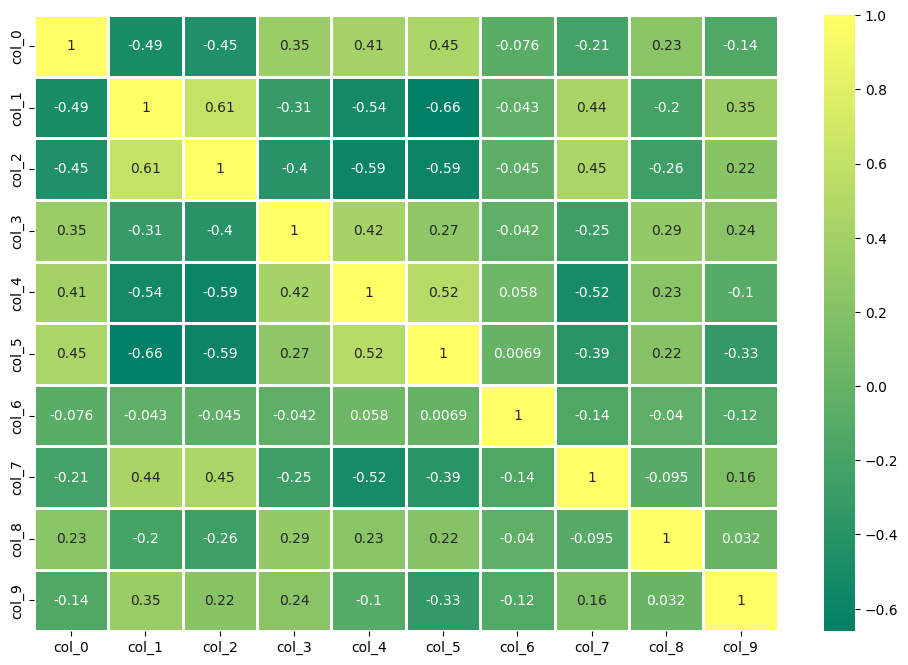

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',
            linewidths=1)

### data standardization

In [16]:
X_values = df_linear.iloc[:,:-1].values

In [17]:
y_values = df_linear.iloc[:,-1].values

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_values = scaler.fit_transform(X_values)

In [21]:
np.mean(X_values),np.std(X_values)

(-1.0373923942097463e-16, 1.0)

In [22]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,-0.576590,0.834881,1.268863,0.337453,-0.744489,-0.958663,1.865415,0.469103,-1.225911,0.084795
1,0.129787,-0.976571,-0.857178,-0.361571,0.285170,0.370419,-0.423208,-0.887944,-0.445326,-1.022465
2,0.056346,0.780833,0.767608,-1.674416,-0.989220,-0.552043,-0.656153,0.553320,-1.266518,-0.552017
3,0.201845,0.029735,-0.583080,-1.419291,0.579122,-0.194416,0.196365,-1.333457,-1.172165,-0.902074
4,1.231941,-0.897840,-1.061697,1.034143,0.602032,0.288074,0.000416,-0.630439,0.245180,-1.015383
...,...,...,...,...,...,...,...,...,...,...
495,0.842091,-0.275115,0.079701,0.498445,0.340091,-0.114117,-0.245907,0.690444,0.197537,-0.726592
496,0.215592,-1.232573,-0.293184,-0.216777,-0.220106,0.738061,-1.068095,0.712988,-0.034121,0.300886
497,1.566573,-0.985485,-1.074626,-1.811564,-0.887315,0.061809,1.383430,0.107075,0.115788,-2.808434
498,-1.790237,1.175916,1.092213,-0.786994,-0.478104,0.297571,0.069969,0.087814,-0.363838,1.380671


### pca application

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca_general = PCA()

In [25]:
pca_general.fit(X_values)

PCA()

In [26]:
explained_variance = pca_general.explained_variance_ratio_

In [27]:
explained_variance

array([0.39005736, 0.14252111, 0.10563451, 0.08503339, 0.06946151,
       0.05063072, 0.0450599 , 0.04128391, 0.03772956, 0.03258804])

In [28]:
eigenvalues = pca_general.explained_variance_

In [29]:
pd.DataFrame(eigenvalues)

,0
0,3.908390
1,1.428067
2,1.058462
3,0.852038
4,0.696007
5,0.507322
6,0.451502
7,0.413666
8,0.378052
9,0.326533


In [30]:
eigenvectors = pca_general.components_

### scree plot

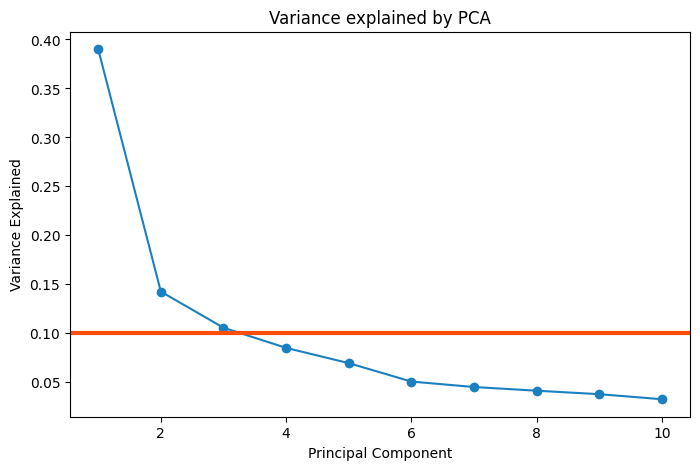

In [31]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [32]:
pca = PCA(n_components=2)

In [33]:
principal_components = pca.fit_transform(X_values)

In [34]:
pd.DataFrame(principal_components).head(8)

,0,1
0,1.989103,-0.612637
1,-1.304821,-1.155632
2,2.036264,-1.229210
3,-0.403509,-1.872577
4,-2.248810,-0.115557
5,-1.989787,0.020806
6,-1.598013,-1.305250
7,1.636833,-1.410185


In [35]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [36]:
final_df = pd.concat([principal_df,df_linear[['target']]],axis = 1)

In [37]:
final_df

,principal component 1,principal component 2,target
0,1.989103,-0.612637,1
1,-1.304821,-1.155632,3
2,2.036264,-1.229210,1
3,-0.403509,-1.872577,2
4,-2.248810,-0.115557,3
...,...,...,...
495,-0.504194,0.132121,2
496,-0.548141,0.224845,2
497,-1.005734,-3.193659,2
498,2.115411,0.242176,1


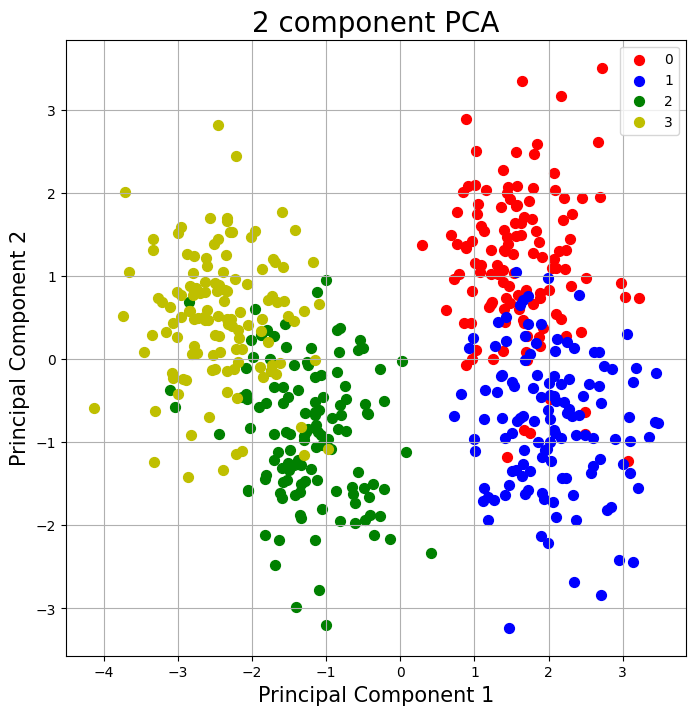

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

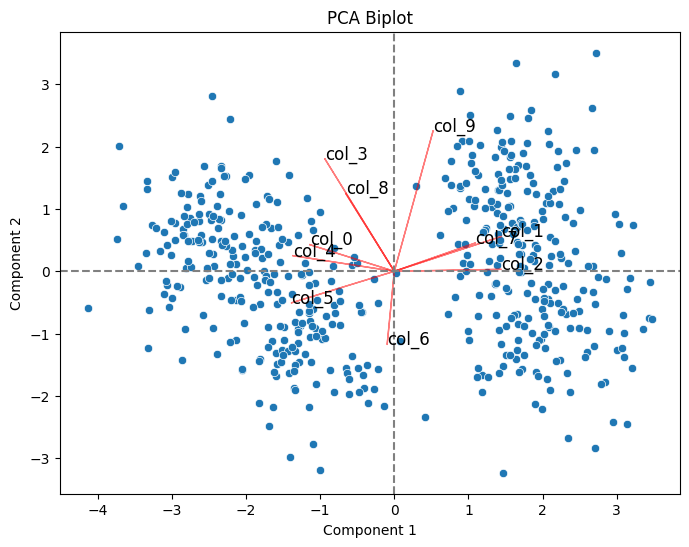

In [39]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

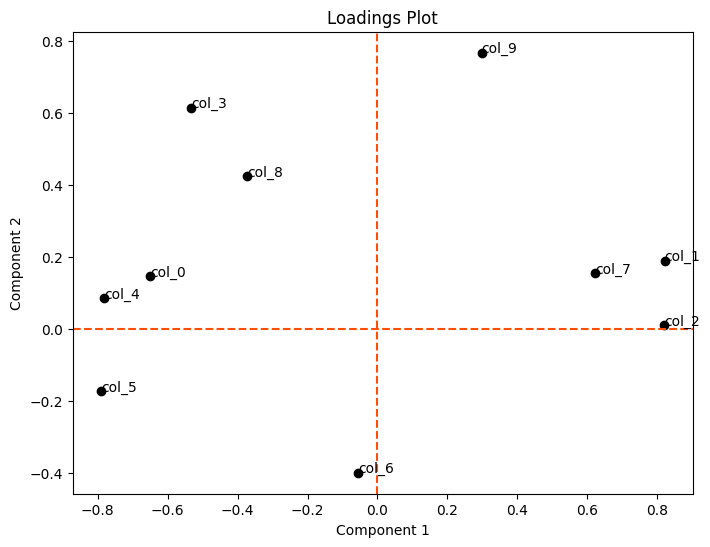

In [40]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [41]:
scores_pca = pca.transform(X_values)

In [42]:
pd.DataFrame(scores_pca).head()

,0,1
0,1.989103,-0.612637
1,-1.304821,-1.155632
2,2.036264,-1.229210
3,-0.403509,-1.872577
4,-2.248810,-0.115557


### clustering 

In [43]:
from sklearn.cluster import KMeans

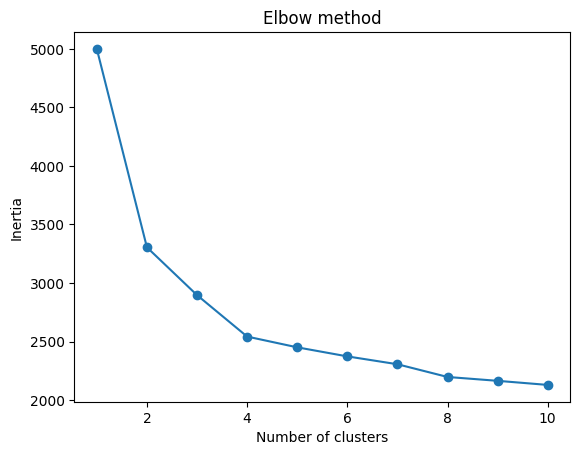

In [44]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(X_values)

KMeans(n_clusters=4)

In [47]:
df_linear['k_means'] = kmeans.labels_

In [48]:
df_linear

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target,k_means
0,-5.915826,9.415179,10.238744,2.932082,-7.560789,-8.384469,3.817842,3.587400,-4.383650,-1.607136,1,1
1,-1.011345,-8.364777,-7.523082,-2.183446,1.108751,2.778589,-8.090733,-6.473995,-0.460039,-9.216038,3,3
2,-1.521256,8.884683,6.051055,-11.790977,-9.621378,-4.969239,-9.302836,4.211802,-4.587759,-5.983203,1,1
3,-0.511033,1.512426,-5.233148,-9.923943,3.583774,-1.965502,-4.866862,-9.777110,-4.113496,-8.388731,2,3
4,6.641074,-7.592013,-9.231718,8.030529,3.776678,2.086960,-5.886460,-4.564809,3.010796,-9.167377,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.934286,-1.479775,0.303991,4.110236,1.571178,-1.291063,-7.168167,5.228464,2.771318,-7.182853,2,0
496,-0.415591,-10.877519,-2.811240,-1.123830,-3.145576,5.866439,-11.446325,5.395608,1.606887,-0.122200,2,0
497,8.964476,-8.452273,-9.339726,-12.794640,-8.763353,0.186548,1.309891,0.903259,2.360404,-21.488913,2,3
498,-14.342360,12.762542,8.762939,-5.296737,-5.317876,2.166731,-5.524547,0.760455,-0.050439,7.297902,1,1


In [49]:
from scipy.optimize import linear_sum_assignment

y_true = df_linear['target'].values  
y_kmeans = df_linear['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_linear['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_linear['k_means'] == y_true))

accuracy before: 0.274
accuracy after: 0.602


In [50]:
df_linear

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target,k_means
0,-5.915826,9.415179,10.238744,2.932082,-7.560789,-8.384469,3.817842,3.587400,-4.383650,-1.607136,1,0
1,-1.011345,-8.364777,-7.523082,-2.183446,1.108751,2.778589,-8.090733,-6.473995,-0.460039,-9.216038,3,2
2,-1.521256,8.884683,6.051055,-11.790977,-9.621378,-4.969239,-9.302836,4.211802,-4.587759,-5.983203,1,0
3,-0.511033,1.512426,-5.233148,-9.923943,3.583774,-1.965502,-4.866862,-9.777110,-4.113496,-8.388731,2,2
4,6.641074,-7.592013,-9.231718,8.030529,3.776678,2.086960,-5.886460,-4.564809,3.010796,-9.167377,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.934286,-1.479775,0.303991,4.110236,1.571178,-1.291063,-7.168167,5.228464,2.771318,-7.182853,2,1
496,-0.415591,-10.877519,-2.811240,-1.123830,-3.145576,5.866439,-11.446325,5.395608,1.606887,-0.122200,2,1
497,8.964476,-8.452273,-9.339726,-12.794640,-8.763353,0.186548,1.309891,0.903259,2.360404,-21.488913,2,2
498,-14.342360,12.762542,8.762939,-5.296737,-5.317876,2.166731,-5.524547,0.760455,-0.050439,7.297902,1,0


In [51]:
print(np.unique(df_linear['target']))

[0 1 2 3]


In [52]:
print(np.unique(kmeans.labels_))

[0 1 2 3]


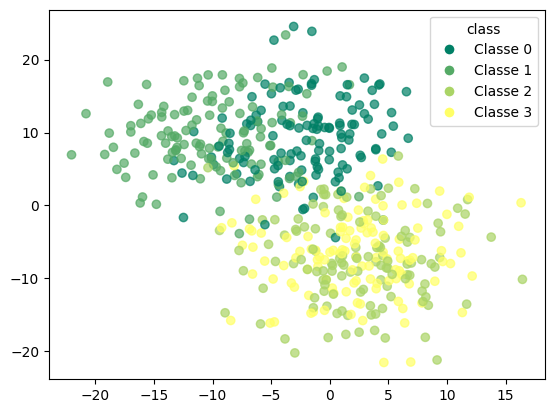

In [53]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_linear['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Classe {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

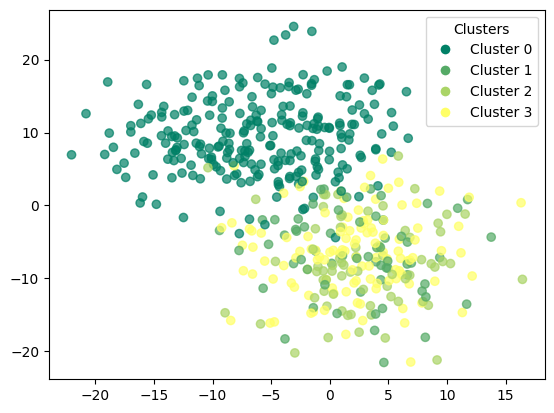

In [54]:
scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_linear['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [55]:
kmeans.cluster_centers_

array([[ 0.61252015, -0.81630453, -0.43401916, -0.45915431,  0.2521893 ,
         0.85636844, -0.87998042,  0.22665094,  0.42872406, -0.99438487],
       [-0.59907025,  0.83608028,  0.75557431, -0.36507269, -0.6865835 ,
        -0.77338999, -0.05302504,  0.53880595, -0.29006075,  0.42388959],
       [ 0.54648713, -0.78130877, -1.03412339,  1.15644282,  1.27567933,
         0.75785991,  0.18842369, -1.07360251,  0.47705619,  0.2047355 ],
       [ 0.67579761, -0.94592507, -0.57082613, -0.2389216 ,  0.0782854 ,
         0.72607407,  0.65115787, -0.31526785, -0.14797621, -0.97827607]])

In [56]:
print(confusion_matrix(df_linear['target'],df_linear['k_means']))

[[125   0   0   0]
 [125   0   0   0]
 [  0  61  61   3]
 [  0   1   9 115]]


In [57]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.87      0.49      0.63       125
           3       0.97      0.92      0.95       125

    accuracy                           0.60       500
   macro avg       0.59      0.60      0.56       500
weighted avg       0.59      0.60      0.56       500



### clustering with pca

In [58]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

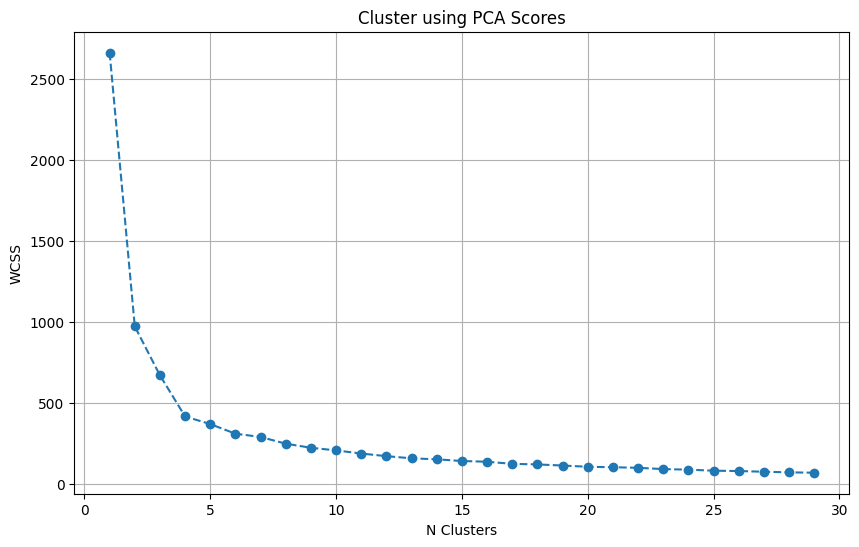

In [59]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [60]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [61]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [62]:
df_pca_kmeans = df_linear.copy()

In [63]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [64]:
df_pca_kmeans

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target,k_means,kmeans_pca
0,-5.915826,9.415179,10.238744,2.932082,-7.560789,-8.384469,3.817842,3.587400,-4.383650,-1.607136,1,0,1
1,-1.011345,-8.364777,-7.523082,-2.183446,1.108751,2.778589,-8.090733,-6.473995,-0.460039,-9.216038,3,2,2
2,-1.521256,8.884683,6.051055,-11.790977,-9.621378,-4.969239,-9.302836,4.211802,-4.587759,-5.983203,1,0,1
3,-0.511033,1.512426,-5.233148,-9.923943,3.583774,-1.965502,-4.866862,-9.777110,-4.113496,-8.388731,2,2,2
4,6.641074,-7.592013,-9.231718,8.030529,3.776678,2.086960,-5.886460,-4.564809,3.010796,-9.167377,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.934286,-1.479775,0.303991,4.110236,1.571178,-1.291063,-7.168167,5.228464,2.771318,-7.182853,2,1,2
496,-0.415591,-10.877519,-2.811240,-1.123830,-3.145576,5.866439,-11.446325,5.395608,1.606887,-0.122200,2,1,2
497,8.964476,-8.452273,-9.339726,-12.794640,-8.763353,0.186548,1.309891,0.903259,2.360404,-21.488913,2,2,2
498,-14.342360,12.762542,8.762939,-5.296737,-5.317876,2.166731,-5.524547,0.760455,-0.050439,7.297902,1,0,1


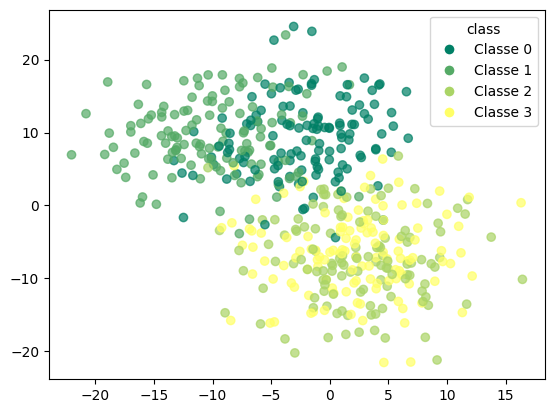

In [65]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Classe {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

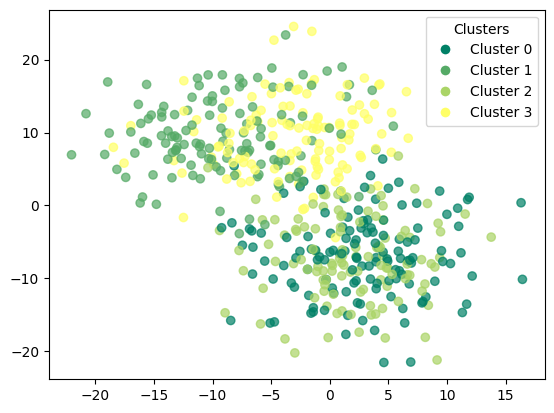

In [66]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [67]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.432
accuracy after: 0.884


In [68]:
df_pca_kmeans

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target,k_means,kmeans_pca
0,-5.915826,9.415179,10.238744,2.932082,-7.560789,-8.384469,3.817842,3.587400,-4.383650,-1.607136,1,0,1
1,-1.011345,-8.364777,-7.523082,-2.183446,1.108751,2.778589,-8.090733,-6.473995,-0.460039,-9.216038,3,2,2
2,-1.521256,8.884683,6.051055,-11.790977,-9.621378,-4.969239,-9.302836,4.211802,-4.587759,-5.983203,1,0,1
3,-0.511033,1.512426,-5.233148,-9.923943,3.583774,-1.965502,-4.866862,-9.777110,-4.113496,-8.388731,2,2,2
4,6.641074,-7.592013,-9.231718,8.030529,3.776678,2.086960,-5.886460,-4.564809,3.010796,-9.167377,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.934286,-1.479775,0.303991,4.110236,1.571178,-1.291063,-7.168167,5.228464,2.771318,-7.182853,2,1,2
496,-0.415591,-10.877519,-2.811240,-1.123830,-3.145576,5.866439,-11.446325,5.395608,1.606887,-0.122200,2,1,2
497,8.964476,-8.452273,-9.339726,-12.794640,-8.763353,0.186548,1.309891,0.903259,2.360404,-21.488913,2,2,2
498,-14.342360,12.762542,8.762939,-5.296737,-5.317876,2.166731,-5.524547,0.760455,-0.050439,7.297902,1,0,1


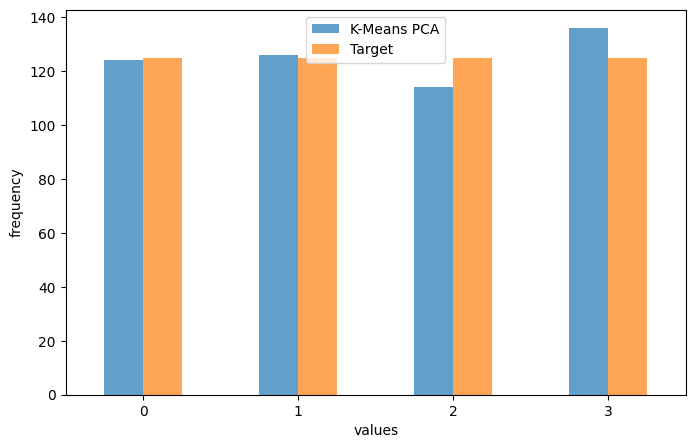

In [69]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [70]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[109  16   0   0]
 [ 15 110   0   0]
 [  0   0 106  19]
 [  0   0   8 117]]


In [71]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       125
           1       0.87      0.88      0.88       125
           2       0.93      0.85      0.89       125
           3       0.86      0.94      0.90       125

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



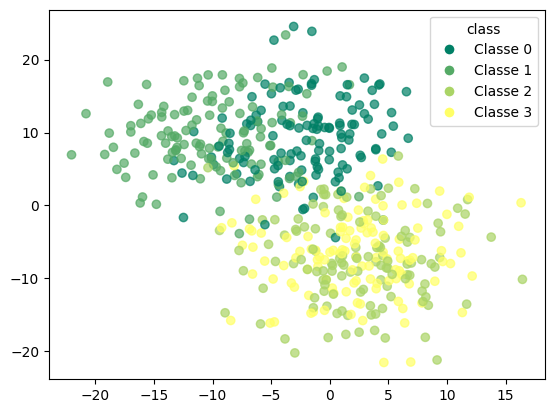

In [72]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Classe {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

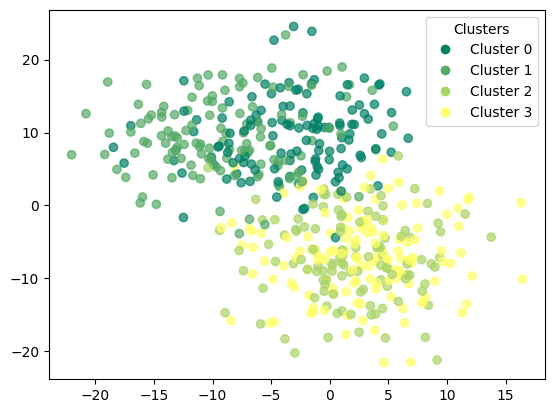

In [73]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

## non linear dataset

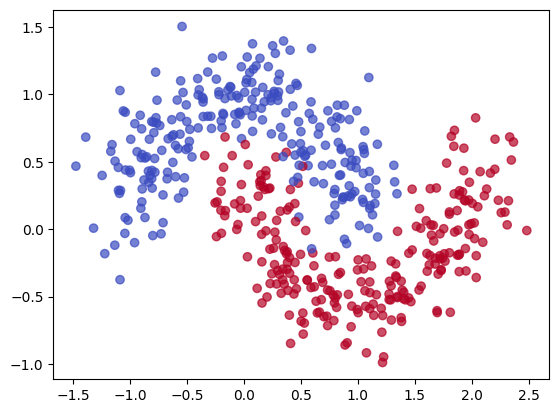

In [74]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))  
X_extended = np.hstack((X, extra_features))

df2 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df2["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [75]:
df2

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,0.830858,-0.334342,0.516941,-0.203730,0.453981,0.061740,-0.062143,-0.105692,0.373306,0.162789,1.137913,-0.426112,1
1,0.991710,0.879000,0.259051,-0.264601,-0.434643,-0.005434,0.068676,1.459087,-0.092073,-0.565089,0.136505,-1.037320,0
2,1.107245,-0.470344,-0.045978,0.008013,0.397300,0.486811,-0.251785,-0.075307,-0.383060,-0.564031,0.154947,-0.636793,1
3,-0.140899,1.033148,-0.207313,-0.497587,0.274842,0.900715,-0.650794,-0.926509,-0.062443,0.007849,0.109330,-0.223160,0
4,0.405592,1.328529,-0.100320,0.183755,0.520215,-0.977524,-0.184470,0.106904,-0.458988,0.865585,-0.317705,-0.020646,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.265123,1.023197,-1.229085,-0.490382,-0.056828,0.799562,0.336567,0.152543,-0.200060,-0.291583,0.702824,0.100369,0
496,0.193576,-0.011663,-1.051300,-0.336770,-0.429108,-0.273132,0.281455,-0.053722,-0.038433,0.656737,-0.348231,0.932100,1
497,0.345548,-0.128434,-0.335654,0.044599,-0.140602,0.061710,0.222296,0.216918,-0.376559,-0.561457,1.251586,-0.241992,1
498,1.403890,-0.466993,0.349606,-0.803821,-0.139806,-0.063600,0.236408,-1.361227,0.083070,-0.574871,0.162173,-0.518165,1


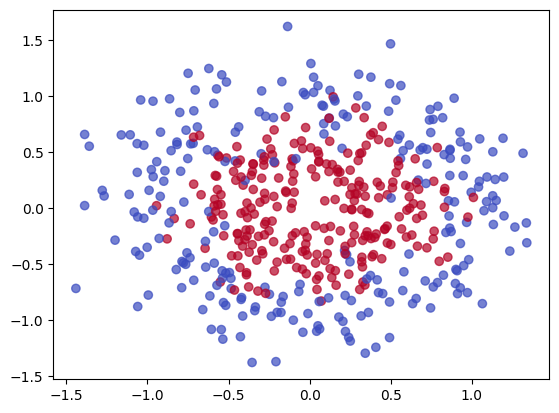

In [76]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df3 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df3["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [77]:
df3

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,-0.469004,0.323509,-0.307472,-0.412583,0.113119,0.558967,-0.584658,-0.075074,-0.866247,-0.196601,0.017102,-0.427312,1
1,0.125867,1.048157,-0.228496,-0.704113,0.038539,0.527847,-0.548572,-0.311336,0.251273,0.606045,-0.746595,-0.084392,0
2,-0.386288,0.042201,0.141565,-0.051028,-1.238396,0.250545,0.759668,0.058331,-0.515553,-0.256564,0.884957,0.454981,1
3,-0.494481,-0.578267,0.320013,0.178206,-0.330569,-0.100286,-0.038961,0.274787,0.754459,0.559169,-0.709692,0.111997,0
4,-0.714102,0.865415,0.368382,0.309430,-0.314617,1.457055,-0.638542,-0.541594,0.116798,1.058402,-0.418097,-0.132914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.854312,0.509894,0.595350,0.098319,0.172222,0.590611,-0.048072,0.377094,0.341931,-0.643235,0.736492,-0.710151,0
496,0.600061,-0.021119,0.458683,-0.758537,0.300618,0.930957,-0.106489,-0.128178,0.305220,-0.164698,0.909139,0.096096,1
497,-0.715531,0.630037,-0.160085,-0.270143,-0.466474,-0.313877,-0.175337,-0.243820,-0.329088,1.049421,-0.515048,0.073316,1
498,-0.318829,-0.743461,0.296261,0.315054,-0.029304,-0.120351,0.225774,0.133261,-0.129479,-0.780939,-0.233962,-0.573275,1
